In [2]:
from si import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
filepath = "./data/dqc_files_rerun/"
files = os.listdir(filepath)
print(files)

['gm2DQC_ana_34110390_26147.00170.root', 'gm2DQC_ana_34110412_26166.00457.root', 'gm2DQC_ana_34110402_26181.00031.root', 'gm2DQC_ana_34110413_26229.00009.root', 'gm2DQC_ana_34110394_26150.00309.root', 'gm2DQC_ana_34110412_26131.00002.root', 'gm2DQC_ana_34110388_26101.00051.root', 'gm2DQC_ana_34110413_26136.00009.root', 'gm2DQC_ana_34110413_26249.00007.root', 'gm2DQC_ana_34110410_26100.00491.root', 'gm2DQC_ana_34110393_26081.00110.root', 'gm2DQC_ana_34110376_26178.00030.root', 'gm2DQC_ana_34110400_26142.00113.root', 'gm2DQC_ana_34110390_26170.00332.root', 'gm2DQC_ana_34110426_26220.00007.root', 'gm2DQC_ana_34110410_26030.00003.root', 'gm2DQC_ana_34110410_26159.00036.root', 'gm2DQC_ana_34110413_26147.00131.root', 'gm2DQC_ana_34110393_26179.00183.root', 'gm2DQC_ana_34110400_26150.00144.root', 'gm2DQC_ana_34110375_26136.00048.root', 'gm2DQC_ana_34110409_26134.00009.root', 'gm2DQC_ana_34110394_26136.00004.root', 'gm2DQC_ana_34110410_26126.00006.root', 'gm2DQC_ana_34110426_26147.00075.root',

In [4]:
f = r.TFile("./data/dqc_files/gm2DQC_ana_34007816_26100.00408.root")
f.cd("offNearlineWithDQC")
t = f.Get("offNearlineWithDQC/timeTree")
t.Print()
f.ls()

******************************************************************************
*Tree    :timeTree  : Time Tree                                              *
*Entries :       41 : Total =            5176 bytes  File  Size =       2004 *
*        :          : Tree compression factor =   1.52                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :       41 : Total  Size=        730 bytes  File Size  =        101 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.39     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :       41 : Total  Size=        745 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.35     *
*...................................................

In [10]:
dirnames = [
    'offNearlineNoDQC',
    'offNearlineWithDQC',
    'offNearlineWithT0DQC',
    'offNearlineWithLaserDQC',
    'offNearlineWithKickerDQC',
]

toplot = 'allCaloWiggle'

In [11]:
hists = []
thesenames = []
for i, file in enumerate(files):
    if(".root" in file and ".root." not in file):
        try:
            fi = r.TFile(filepath+file)
        except:
            print("Unable to open file")
            continue
        for j,name in enumerate(dirnames):
            hi = fi.Get(name+"/"+toplot).Clone()
            #print(hi)
            hi.SetLineColor(i+1)
            hi.SetDirectory(0)
            
            try:
                if(len(hists) < len(dirnames)):
                    hists.append(hi.Clone(name))
                    hists[j].SetDirectory(0)
                    thesenames.append(name)
                else:
                    hists[j].Add(hi)
            except:
                print("Error in:", file)
print(hists)

[<ROOT.TH1D object ("offNearlineNoDQC") at 0x5594ca480680>, <ROOT.TH1D object ("offNearlineWithDQC") at 0x5594cb1ca360>, <ROOT.TH1D object ("offNearlineWithT0DQC") at 0x5594cb1aa6c0>, <ROOT.TH1D object ("offNearlineWithLaserDQC") at 0x5594cb008800>, <ROOT.TH1D object ("offNearlineWithKickerDQC") at 0x5594cab25330>]


In [12]:
print(thesenames)
print(dirnames)

['offNearlineNoDQC', 'offNearlineWithDQC', 'offNearlineWithT0DQC', 'offNearlineWithLaserDQC', 'offNearlineWithKickerDQC']
['offNearlineNoDQC', 'offNearlineWithDQC', 'offNearlineWithT0DQC', 'offNearlineWithLaserDQC', 'offNearlineWithKickerDQC']


name      		 nctag           nctag/NoDQC
offNearlineNoDQC 	 2109289.0 	 1.0
offNearlineWithDQC 	 1415058.0 	 0.6708696627157302
offNearlineWithT0DQC 	 2099568.0 	 0.9953913380290704
offNearlineWithLaserDQC 	 2109288.0 	 0.9999995259065969
offNearlineWithKickerDQC 	 1415962.0 	 0.6712982431520763


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


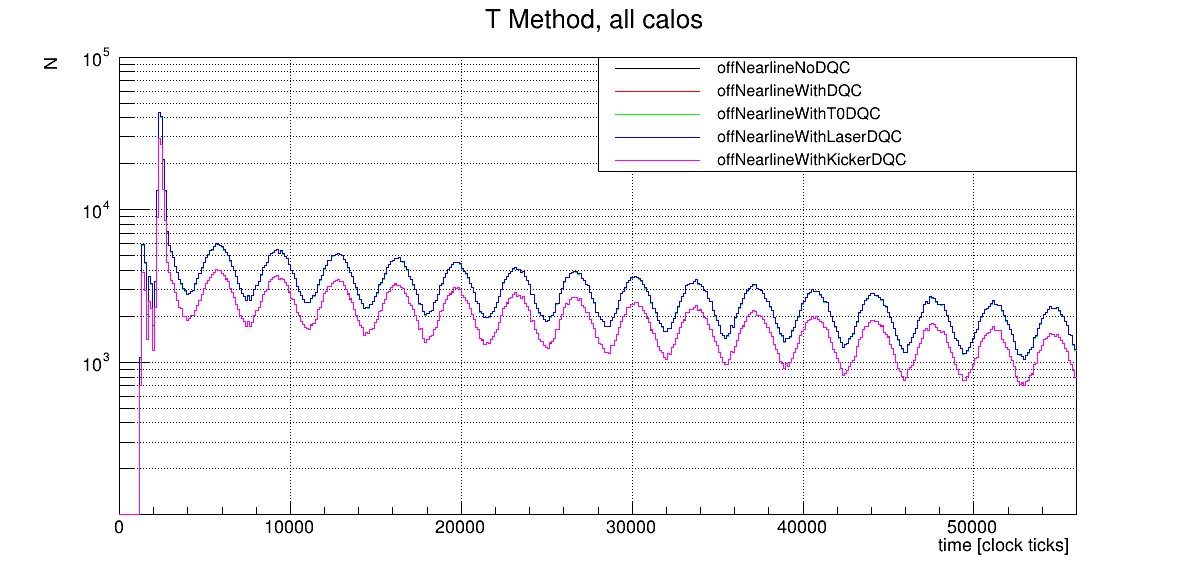

In [22]:
c = r.TCanvas("c","c",1200,600)

leg = r.TLegend(0.5,0.7,0.9,0.9)

refctag = 0
print("name      \t\t nctag           nctag/NoDQC")

for i,name in enumerate(dirnames):
    hi = hists[i]
    if(i < 4):
        hi.SetLineColor(i+1)
    else:
        hi.SetLineColor(i+2)
    hi.GetXaxis().SetRangeUser(0,70*1000/1.25)
    hi.GetYaxis().SetRangeUser(100,100000)
    thisctag = hi.Integral(hi.FindBin(30), -1)
    if(i < 1):
        refctag = hi.Integral(hi.FindBin(30), -1)
    print(name, "\t", thisctag, "\t", thisctag/refctag )
    
    if(i>0):
        hi.DrawCopy("hist same")
    else:
        hi.DrawCopy("hist")
    leg.AddEntry(hi,name,"l")
    
    
c.SetLogy()
leg.Draw()
c.SetGrid()
c.Draw()

In [14]:
1415058.0/2109289.0

0.6708696627157302

---

### TChain files

In [8]:
hists2 = []
for i, name in enumerate(dirnames):
    t = r.TChain(name+"/timeTree")
    n = t.Add(filepath+"*.root")
    print(name,t,n)
    h = r.TH1D("h",name+"; event number; N",500,0,500)
    t.Draw("eventNum>>h","","goff")
    hists2.append(h.Clone("name"))

offNearlineWithT0DQC Name: offNearlineWithT0DQC/timeTree Title:  120
offNearlineWithLaserDQC Name: offNearlineWithLaserDQC/timeTree Title:  120
offNearlineWithKickerDQC Name: offNearlineWithKickerDQC/timeTree Title:  120


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


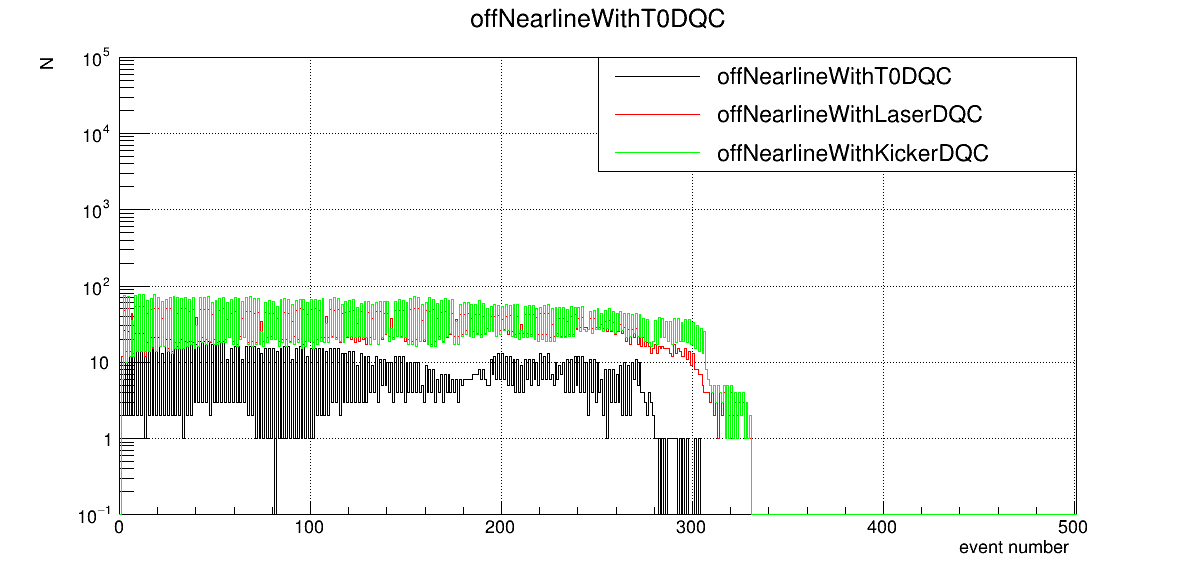

In [9]:
c = r.TCanvas("c","c",1200,600)

leg = r.TLegend(0.5,0.7,0.9,0.9)

for i,name in enumerate(dirnames):
    hi = hists2[i]
    if(i < 4):
        hi.SetLineColor(i+1)
    else:
        hi.SetLineColor(i+2)
    hi.GetXaxis().SetRangeUser(0,70*1000/1.25)
    hi.GetYaxis().SetRangeUser(0.1,100000)
    
    if(i>0):
        hi.DrawCopy("hist same")
    else:
        hi.DrawCopy("hist")
    leg.AddEntry(hi,name,"l")
    
    
c.SetLogy()
leg.Draw()
c.SetGrid()
c.Draw()

offNearlineWithT0DQC Name: offNearlineWithT0DQC/timeTree Title:  120
offNearlineWithLaserDQC Name: offNearlineWithLaserDQC/timeTree Title:  120
offNearlineWithKickerDQC Name: offNearlineWithKickerDQC/timeTree Title:  120


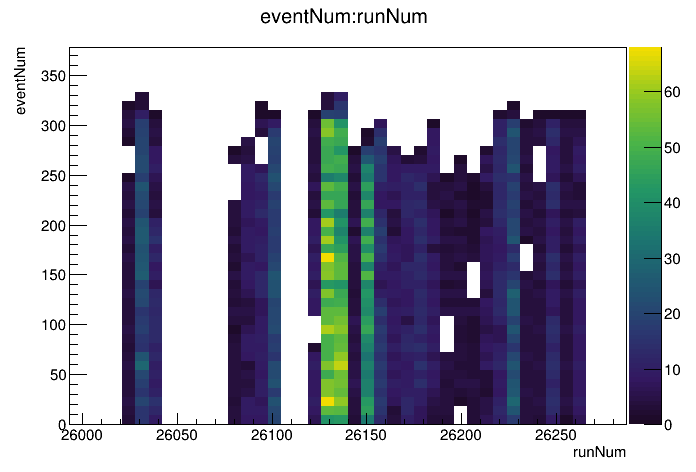

In [10]:
for i, name in enumerate(dirnames):
    c = r.TCanvas()
    t = r.TChain(name+"/timeTree")
    n = t.Add(filepath+"*.root")
    print(name,t,n)
    t.Draw("eventNum:runNum","","colz")
    c.Draw()